# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [42]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [44]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [45]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [46]:
# Extract all rows of data
table = soup.find("table")


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [47]:
# Extract Headers
headers = [header.text.strip() for header in table.find_all("th")]
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
for row in table.find_all("tr")[1:]: # Skip header row
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells] #Extract text 
    rows_list.append(row_data) # Append row data to the list
    

In [48]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(rows_list, columns=headers)


In [49]:
# Confirm DataFrame was created successfully
mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [50]:
# Examine data type of each column
print(mars_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [51]:
# Change data types for data analysis
for column in mars_df.columns:
    try:
        mars_df[column] = pd.to_numeric(mars_df[column])
    except ValueError:
        pass


In [52]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)


id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [53]:
mars_df.columns = mars_df.columns.str.strip()

In [54]:
# 1. How many months are there on Mars?
# Count the number of unique months on Mars
if 'month' in mars_df.columns:
    num_months = mars_df['month'].nunique()
    print(f"Number of months on Mars: {num_months}")
else:
    print("Column 'month' not found in mars_df.columns.")


Number of months on Mars: 12


In [55]:
# 2. How many sols (Martian days) worth of data are there?
if 'sol' in mars_df.columns:
    num_sols = mars_df['sol'].nunique()
    print(f"Number of sols (Martian days) worth of data: {num_sols}")


Number of sols (Martian days) worth of data: 1867


In [56]:
# 3. What is the average minimum temperature by month?
if 'month' in mars_df.columns and 'min_temp' in mars_df.columns:
    avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
    print("Average minimum temperature by month:")
    print(avg_min_temp_by_month)


Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


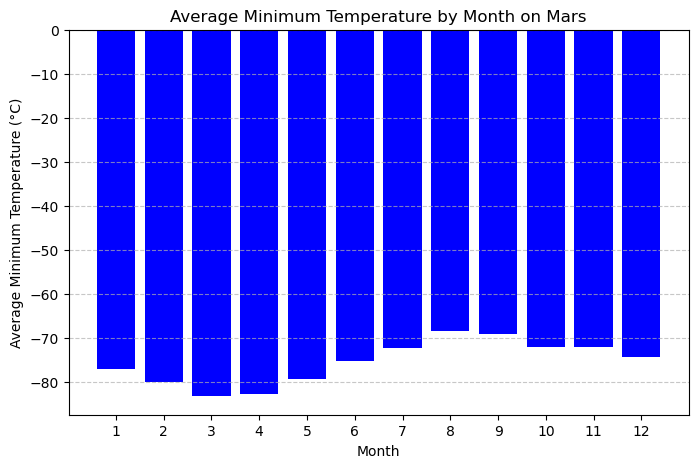

In [57]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8,5))
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month.values, color='b')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xticks(avg_min_temp_by_month.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


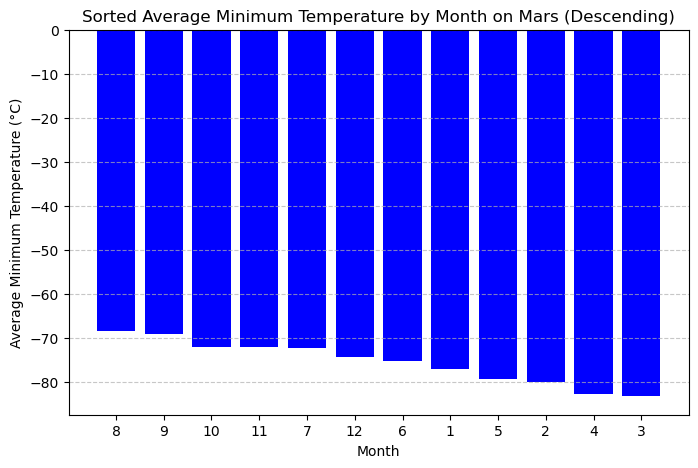

In [58]:
 # Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature in descending order
sorted_avg_min_temp_desc = avg_min_temp_by_month.sort_values(ascending=False)

# Convert month indices to string to prevent auto-sorting
sorted_months = sorted_avg_min_temp_desc.index.astype(str)

# Plot the sorted bar chart in descending order
plt.figure(figsize=(8,5))
plt.bar(sorted_months, sorted_avg_min_temp_desc.values, color='b')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Sorted Average Minimum Temperature by Month on Mars (Descending)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






In [59]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_by_month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

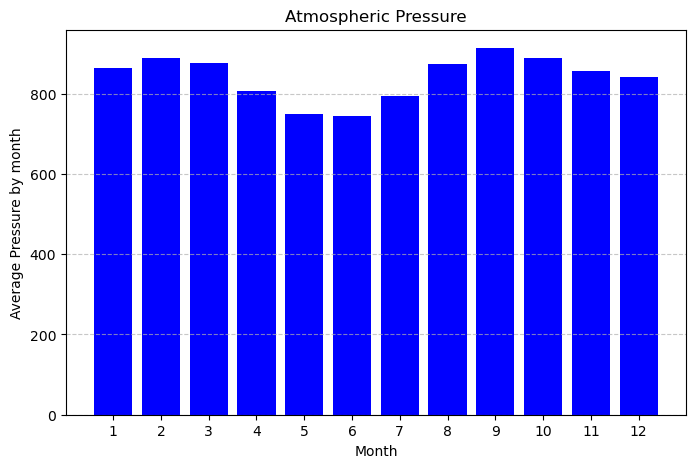

In [60]:
# Plot the average pressure by month
plt.figure(figsize=(8,5))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values, color='b')
plt.xlabel('Month')
plt.ylabel('Average Pressure by month')
plt.title('Atmospheric Pressure')
plt.xticks(avg_pressure_by_month.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


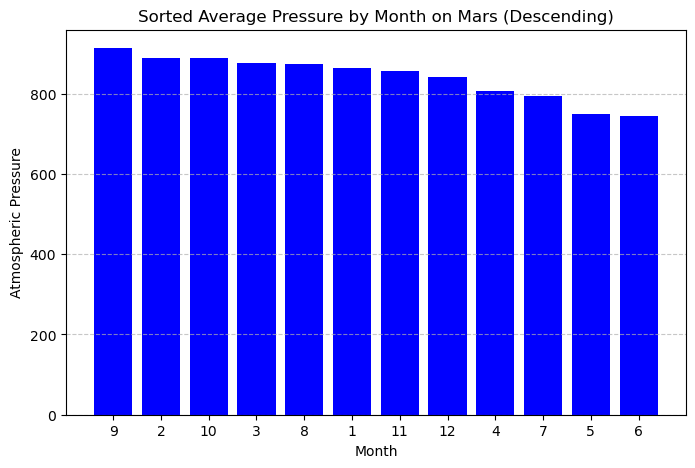

In [61]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature in descending order
sorted_avg_pressure = avg_pressure_by_month.sort_values(ascending=False)

# Convert month indices to string to prevent auto-sorting
sorted_pres_months = sorted_avg_pressure.index.astype(str)

# Plot the sorted bar chart in descending order
plt.figure(figsize=(8,5))
plt.bar(sorted_pres_months, sorted_avg_pressure.values, color='b')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Sorted Average Pressure by Month on Mars (Descending)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Martian year in sols: 1977
Martian year in Earth days: 2030.379


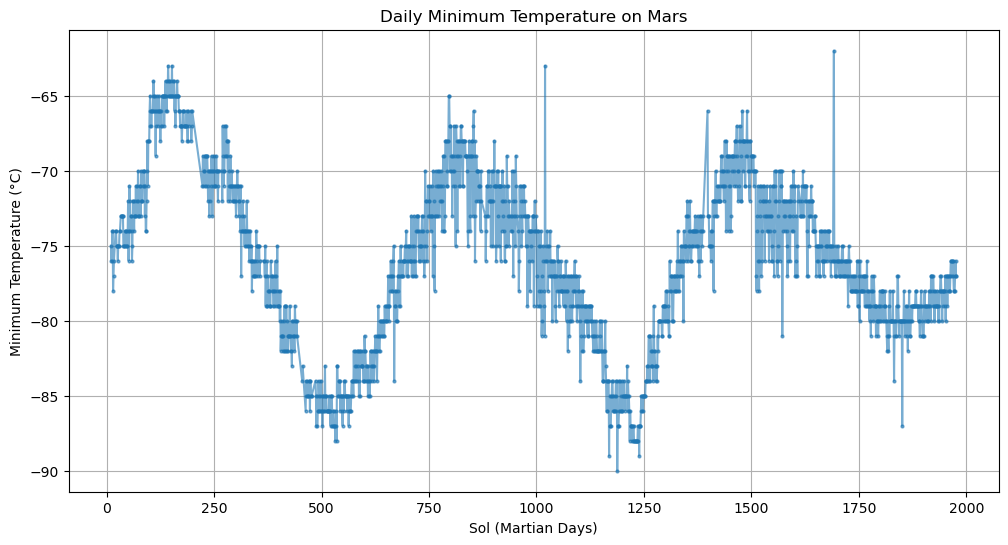

In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Find the maximum sol recorded (length of a Martian year in sols)
martian_year_sols = mars_df["sol"].max()
# # Convert to Earth days (1 sol ≈ 1.027 Earth days)
martian_year_earth_days = martian_year_sols * 1.027

martian_year_sols,  martian_year_earth_days


# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.import matplotlib.pyplot as plt
max_sol = mars_df["sol"].max()

# Convert to Earth days (1 sol ≈ 1.027 Earth days)
martian_year_earth_days = max_sol * 1.027
print(f"Martian year in sols: {max_sol}")
print(f"Martian year in Earth days: {martian_year_earth_days}")

# Plot the daily minimum temperature over sols
plt.figure(figsize=(12, 6))
plt.plot(mars_df["sol"], mars_df["min_temp"], marker='o', linestyle='-', markersize=2, alpha=0.6)
plt.xlabel("Sol (Martian Days)")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature on Mars")
plt.grid(True)
plt.show()



#### Minimum Temperature

YOUR ANALYSIS HERE

The warmest months are in August and Spetember, while the coldest months are in March and April.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

The pressure on Mars does not necessarily correlate with the temperature.

#### Year Length

YOUR ANALYSIS HERE

There are about 687 earth days on mars (about 1.8 years) and becasue Mars takes longer to orbit the sun, the seasons are significatly longer, meaning longer warming and coolning periods. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [78]:
# Write the data to a CSV
mars_df.to_csv("mars_weather_data.csv", index=False)


In [64]:
browser.quit()